# Dimensionality reduction with scikit-learn

Many real-world datasets contain a large number of features (high-dimensional data), as we have seen in the clustering notebook before. While these features may carry useful information, working in high dimensions often makes models harder to interpret, increases computational cost, and makes it difficult to *visualize* patterns such as clusters or class separation.

Dimensionality reduction transforms the original feature space into a smaller number of dimensions while preserving as much of the relevant structure in the data as possible. In this notebook, we will focus on two popular techniques:

- **PCA (Principal Component Analysis)**: a *linear* method mainly used for compression, noise reduction, and as a preprocessing step for machine learning models.
- **t-SNE (t-distributed Stochastic Neighbor Embedding)**: a *non-linear* method designed for visualization, especially useful for revealing local structure and cluster-like groupings in high-dimensional datasets.

A common application is to project high-dimensional data down to 2D or 3D in order to **visualize clustering results** (e.g., from k-means or DBSCAN) and better understand the structure of the data.

Several algorithms for dimensionality reduction are available and described in the scikit-learn [User Guide on decomposition](https://scikit-learn.org/stable/modules/decomposition.html) or [User Guide for manifold learning](https://scikit-learn.org/stable/modules/manifold.html)

In [1]:
# Just in case we need help
# Import bia-bob as a helpful Python & Medical AI expert
from bia_bob import bob
import os

bob.initialize(
    endpoint='https://kiara.sc.uni-leipzig.de/api/v1', 
    model="vllm-llama-4-scout-17b-16e-instruct",
    system_prompt=os.getenv('SYSTEM_PROMPT_MEDICAL_AI')
)

In [2]:
%bob Who are you ? Just 1 sentence!

I am a medical data science AI assistant, an expert in Python programming and data analysis with extensive experience working with various medical datasets.

## Dimensionality reduction for preprocessing

Let's just create our synthetic high-dimensional data again. But this time, we want to use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) as a preprocessing step to project the data into 2 dimensions.

The goal is to reduce the number of features while retaining as much of the **variance** (and therefore structure / information) in the data as possible.

In [3]:
from sklearn.datasets import make_blobs

# Create the data
X, y = make_blobs(
    n_samples=100,
    n_features=5,
    centers=4,
    cluster_std=3
)

PCA has some requirements:
* it operates on continuous numerical variables
* it is variance-based, so data should always be standardized
* it cannot capture nonlinear relationships
* it is sensitive to outliers

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA to get 2-dimensional data
X_pca2 = PCA(n_components=2).fit_transform(X_scaled)

Lets use pandas to have a closer look at the PCA data

In [5]:
import pandas as pd

df = pd.DataFrame(X_pca2, columns=['pca_1','pca_2'])

df.describe().T

,count,mean,std,min,25%,50%,75%,max
pca_1,100.0,-3.996803e-17,1.383060,-2.383808,-1.220088,-0.151058,1.316373,2.954116
pca_2,100.0,1.443290e-17,1.228847,-2.743599,-1.056018,0.149336,0.890181,2.421732


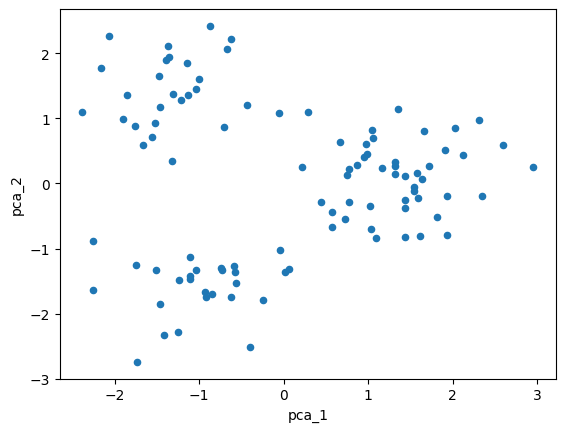

In [6]:
import matplotlib.pyplot as plt

# We can also plot the data now in a 2D scatterplot
df.plot(kind='scatter', x=df.columns[0], y=df.columns[1])
plt.show()

## Clustering and visualization

We can now apply KMeans clustering on the 2-dimensional data and then easily visualize the results.

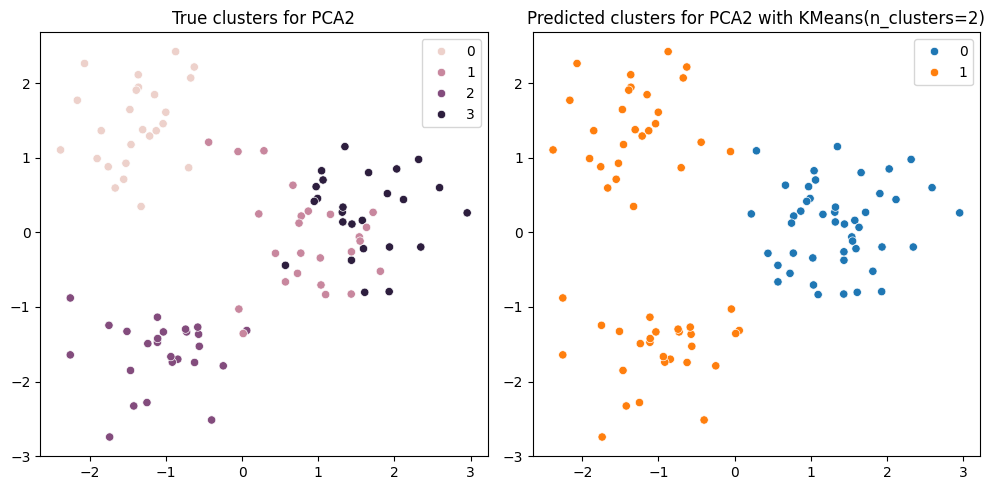

In [7]:
from sklearn.cluster import KMeans
import seaborn as sns

# Apply KMeans clustering on the PCA data
n_clusters = 2
y_pred = KMeans(n_clusters=n_clusters).fit_predict(X_pca2)

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot true clusters for PCA2 data
sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=y, ax=ax1)
ax1.set_title("True clusters for PCA2")

# Plot predicted clusters for KMeans on PCA2 data
sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=y_pred, ax=ax2)
ax2.set_title(f"Predicted clusters for PCA2 with KMeans(n_clusters={n_clusters})")

fig.tight_layout()
plt.show()

## Exercise

Instead of reducing the dimensionality *before* clustering, we can also run the clustering algorithm directly on the original high-dimensional data (as we did in the previous notebook).  
Afterwards, we can use dimensionality reduction to project the clustered data into 2 dimensions for visualization.

Here, we want to use [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). t-SNE has some requirements:

* it operates on continuous numerical variables
* it is distance-based, so data standardization is recommended
* it can capture nonlinear relationships
* it is computationally expensive for large sample / feature sizes
* it does not compute a unique deterministic result (unless random_state is fixed)

**Your tasks:**
* run KMeans on the scaled high-dimensional data `X_scaled`
* apply t-SNE to compute a 2-dimensional embedding of the data
* visualize the results like shown above

**If you get stuck, remember that our assistant bia-bob is available and very happy to help you.**

In [21]:
# ToDo